In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Train Data exploration and visualization

In [2]:
df_train = pd.read_csv('train.csv')
df_train.shape

(404290, 6)

In [3]:

df_train = df_train.loc[np.random.random_integers(0, len(df_train), 10000)]
len(df_train)

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 404290 + 1) instead
  


10000

In [4]:
qids = pd.Series(df_train['qid1'].tolist()+df_train['qid2'].tolist())

In [5]:
qids.value_counts() # Question Number of times repeated

28792     6
4951      5
2559      5
58173     4
2264      4
57        4
23640     4
79395     4
105922    4
72987     4
24272     4
15596     4
1772      4
17761     4
24779     4
14376     4
3576      4
75229     4
4044      4
87051     4
46047     3
22638     3
3392      3
55388     3
25265     3
57789     3
528757    3
2195      3
86321     3
3595      3
         ..
451734    1
5272      1
7321      1
245863    1
435342    1
36399     1
273567    1
218272    1
72159     1
478371    1
425125    1
97743     1
343001    1
294533    1
87168     1
431224    1
296058    1
461947    1
195724    1
205950    1
398477    1
187521    1
99466     1
450429    1
195717    1
386182    1
257159    1
201864    1
7305      1
98304     1
Length: 19131, dtype: int64

In [6]:
unique_qid = set(qids)
unique_qsts = len(unique_qid)
qs_morethan_onetime= sum(qids.value_counts()>1)
qs_morethan_onetime

770

In [7]:
  df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
384680,384680,84825,319370,How can I learn very quickly?,How we can learn quickly?,1
156636,156636,35977,4428,How do I gain weight at sixteen years old?,How do I gain weight as a teenager?,1
168181,168181,260576,49474,I'm 19 years old. I want to start a business t...,I am a 23 year old guy. I want to start a busi...,0
192976,192976,292762,292763,How can I be good at sales?,How can someone be good at sales?,1
78884,78884,67539,134407,Did someone in Game of Thrones really have his...,What if Littlefinger (Game of Thrones) got his...,0


In [8]:
#check how many questions with any null value
nan_count = df_train[df_train.isnull().any(1)]
nan_count

,id,qid1,qid2,question1,question2,is_duplicate


In [9]:
df_train[df_train.isnull().any(1)]
df_train = df_train.fillna('') #Fill null values with '' string

In [10]:
#Re-check how many questions with any null value
nan_count = df_train[df_train.isnull().any(1)]
nan_count #Finally the we found the question with no null values 

,id,qid1,qid2,question1,question2,is_duplicate


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 384680 to 87864
Data columns (total 6 columns):
id              10000 non-null int64
qid1            10000 non-null int64
qid2            10000 non-null int64
question1       10000 non-null object
question2       10000 non-null object
is_duplicate    10000 non-null int64
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


In [12]:
df_train.groupby("is_duplicate")['id'].count() #count the number of 'duplicate' and 'non-duplicate' question

is_duplicate
0    6286
1    3714
Name: id, dtype: int64

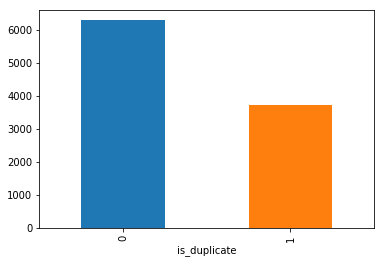

In [13]:
df_train.groupby("is_duplicate")['id'].count().plot.bar() #plot the graph for the above data

In [14]:
is_duplicate0 = len(df_train[df_train['is_duplicate']==0])
is_duplicate0/len(df_train)
print("Percentage of non-Duplicate Questions: %d percentage"%((is_duplicate0/len(df_train))*100))

Percentage of non-Duplicate Questions: 62 percentage


In [15]:
is_duplicate1 = len(df_train[df_train['is_duplicate']==1])
is_duplicate1/len(df_train)

print("Percentage of Duplicate Questions: %d percentage"%((is_duplicate1/len(df_train))*100))

Percentage of Duplicate Questions: 37 percentage


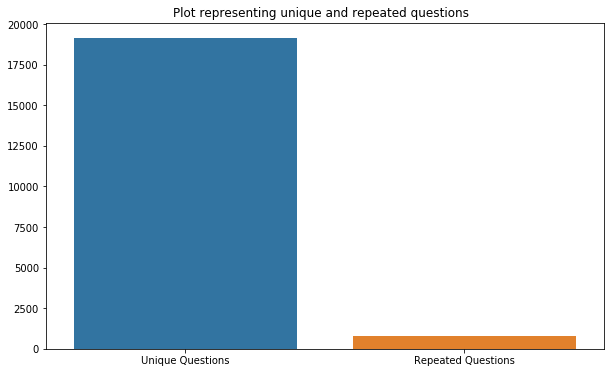

In [16]:
x = ["Unique Questions" , "Repeated Questions"]
y =  [unique_qsts , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

In [17]:
#Check whether there are any repeated pair of questions
pair_duplicates  = df_train[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print('Total Number of pair_duplicates groups: ',pair_duplicates.shape[0])
print('Total Number of row: ',df_train.shape[0]) #If both count are equal then there are no duplicates
print("Total duplicate pairs: ",(df_train.shape[0] - pair_duplicates.shape[0]))

Total Number of pair_duplicates groups:  9870
Total Number of row:  10000
Total duplicate pairs:  130


### Overall info about train Data

In [18]:
df_test = pd.read_csv('test.csv')

In [19]:
print('Total number of question pairs in training dataset: ', len(df_train))
print('total number of question pairs to predict is_duplicate: ', len(df_test))
print('Total number of unique questions in training dataset: ', len(unique_qid))
print("In Train dataset: ")
print('Total percentage of is_duplicate=0: ', round((is_duplicate0/(is_duplicate0+is_duplicate1))*100, 2), "%")
print('Total percentage of is_duplicate=1: ', round((is_duplicate1/(is_duplicate0+is_duplicate1))*100, 2), "%")

Total number of question pairs in training dataset:  10000
total number of question pairs to predict is_duplicate:  2345796
Total number of unique questions in training dataset:  19131
In Train dataset: 
Total percentage of is_duplicate=0:  62.86 %
Total percentage of is_duplicate=1:  37.14 %


###  Feature extraction 

1. **q1_len** = Length of Question-1
2. **q2_len** = Length of Question-2
3. **q1_no_words** = Number of words in Question-1
4. **q2_no_words** = Number of words in Question-2
5. **total_uni_words** = Total number of unique words in Question-1 and Question-2, Combine and find unique.
6. **common_words** = Total number of common words in both Question-1 and Question-2
7. **word_share** = Total number of words share(common_words/total_words)
8. **total_words** = Total number of words unique words in Question-1 and Question-2, find Unique in each and add them.

In [20]:
# def total_uni_words(row):
# #     print(row['question1'])
# df_train['total_uni_words'] = df_train.apply(total_uni_words, axis=1)

In [21]:
df_train['q1_len'] = df_train['question1'].str.len()
df_train['q2_len'] = df_train['question2'].str.len()
df_train['q1_no_words'] = df_train['question1'].apply(lambda x: len(x.split()))
df_train['q2_no_words'] = df_train['question2'].apply(lambda x: len(x.split()))
def total_uni_words(row):
    q1_w = row['question1'].lower().strip().split()
    q2_w = row['question2'].lower().strip().split()
    total_w = len(set(q1_w + q2_w))
    return total_w
df_train['total_uni_words'] = df_train.apply(total_uni_words, axis=1)
def total_words(row):
    q1_w = set(row['question1'].lower().strip().split())
    q2_w = set(row['question2'].lower().strip().split())
    total_w = len(q1_w)+ len(q2_w)
    return total_w

df_train['total_words'] = df_train.apply(total_words, axis=1)

def common_words(row):
    q1_w = set(row['question1'].lower().strip().split())
    q2_w = set(row['question2'].lower().strip().split())
    common_w = len(q1_w.intersection(q2_w)) #find common between two sets
#     x = set(["a","b","c","d"])
#     y = set(["c","d", 'f'])
#     print( y.intersection(x) )
#     outPut: {'c', 'd'}
    return common_w
df_train['common_words'] = df_train.apply(common_words, axis=1)   
def word_share(row):
    w_share = row['common_words']/row['total_words']
    return 1.0*w_share
    
df_train['word_share'] = df_train.apply(word_share, axis=1)   
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share
384680,384680,84825,319370,How can I learn very quickly?,How we can learn quickly?,1,29,25,6,5,7,11,4,0.363636
156636,156636,35977,4428,How do I gain weight at sixteen years old?,How do I gain weight as a teenager?,1,42,35,9,8,12,17,5,0.294118
168181,168181,260576,49474,I'm 19 years old. I want to start a business t...,I am a 23 year old guy. I want to start a busi...,0,97,220,18,48,49,56,7,0.125000
192976,192976,292762,292763,How can I be good at sales?,How can someone be good at sales?,1,27,33,7,7,8,14,6,0.428571
78884,78884,67539,134407,Did someone in Game of Thrones really have his...,What if Littlefinger (Game of Thrones) got his...,0,61,71,12,13,23,25,2,0.080000


\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


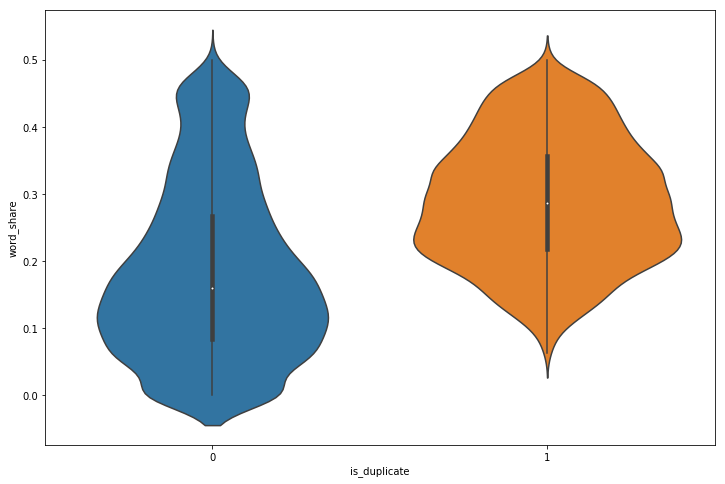

In [22]:
plt.figure(figsize=(12, 8))

sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df_train)

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


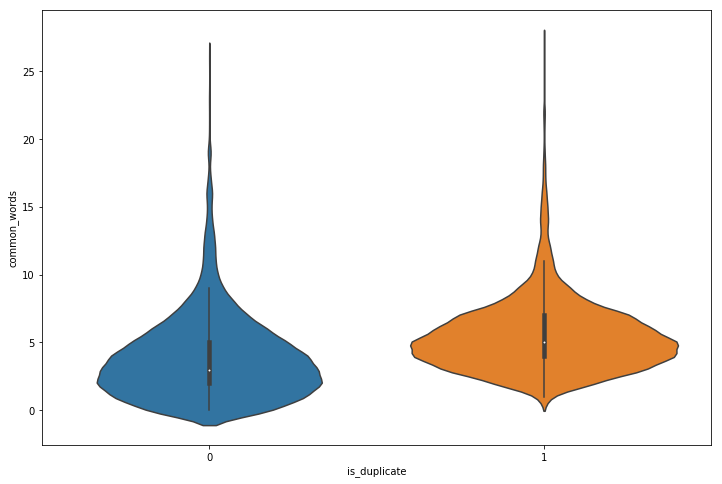

In [23]:
plt.figure(figsize=(12, 8))

sns.violinplot(x = 'is_duplicate', y = 'common_words', data = df_train)

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


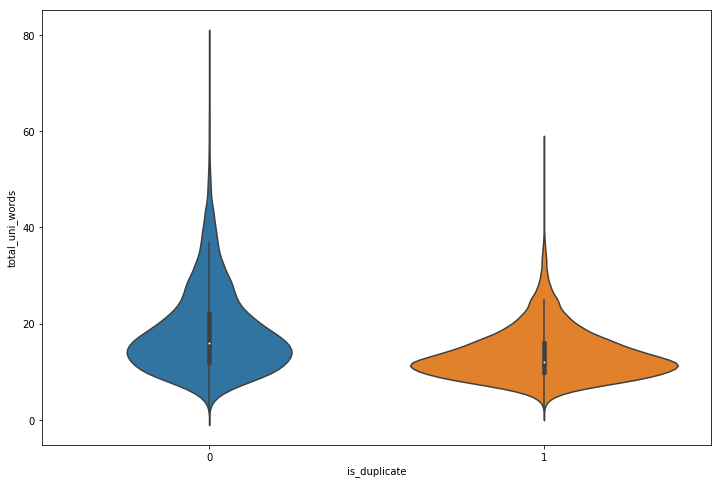

In [24]:
plt.figure(figsize=(12, 8))

sns.violinplot(x = 'is_duplicate', y = 'total_uni_words', data = df_train)

In [25]:
#Some Analysis of extracted feature

print("Shortest length of the question in Question-1: %d"%min(df_train['q1_no_words']))
print("Shortest length of the question in Question-2:  %d"%min(df_train['q2_no_words']))

Shortest length of the question in Question-1: 1
Shortest length of the question in Question-2:  1


In [26]:
df_train = df_train[df_train['q1_no_words']>0]
df_train = df_train[df_train['q2_no_words']>0]
print("Shortest length of the question in Question-1: %d"%min(df_train['q1_no_words']))
print("Shortest length of the question in Question-2:  %d"%min(df_train['q2_no_words']))

Shortest length of the question in Question-1: 1
Shortest length of the question in Question-2:  1


In [27]:
# Now find how many number of questions with min length
print("Total number of question with min length in Question-1: ",df_train[df_train['q1_no_words']==1].shape[0])
print("Total number of question with min length in Question-2: ",df_train[df_train['q2_no_words']==1].shape[0])

Total number of question with min length in Question-1:  1
Total number of question with min length in Question-2:  2


### PreProcessing the text

In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
stop_words = stopwords.words("english")

In [29]:

def preProcess(x):
    x = str(x).lower()
    x = x.replace("won't", "will not")\
            .replace("cannot", "can not")\
            .replace("can't", "can not")\
            .replace("n't", " not")\
            .replace("what's", "what is")\
            .replace("it's", "it is")\
            .replace("i'm", "i am")\
            .replace("'re", " are")\
            .replace("%", " percent ")\
            .replace("€", " euro ")\
            .replace("'ll", " will")\
            .replace(",000,000", "m")\
            .replace(",000", "k")
#     x = re.sub(r"([0-9]+)000000", r"\1m", x)
#     x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    if type(x) == type(''):
        x = porter.stem(x)
        temp = BeautifulSoup(x)
        x = temp.get_text()
#     print(x)
    return x

In [30]:
df_train['question1'] = df_train["question1"].fillna("").apply(preProcess)

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [31]:
df_train['question1'].head()

384680                        how can i learn very quickly?
156636           how do i gain weight at sixteen years old?
168181    i am 19 years old. i want to start a business ...
192976                          how can i be good at sales?
78884     did someone in game of thrones really have his...
Name: question1, dtype: object

In [32]:
df_train['question2'] = df_train["question2"].fillna("").apply(preProcess)

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [33]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share
384680,384680,84825,319370,how can i learn very quickly?,how we can learn quickly?,1,29,25,6,5,7,11,4,0.363636
156636,156636,35977,4428,how do i gain weight at sixteen years old?,how do i gain weight as a teenager?,1,42,35,9,8,12,17,5,0.294118
168181,168181,260576,49474,i am 19 years old. i want to start a business ...,i am a 23 year old guy. i want to start a busi...,0,97,220,18,48,49,56,7,0.125000
192976,192976,292762,292763,how can i be good at sales?,how can someone be good at sales?,1,27,33,7,7,8,14,6,0.428571
78884,78884,67539,134407,did someone in game of thrones really have his...,what if littlefinger (game of thrones) got his...,0,61,71,12,13,23,25,2,0.080000


### Feature Extraction from fuzzywuzzy

In [34]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [35]:
'''
Definations

1. Simple Ratio: Compare two sequences and produce the ratio of those two
2. Partial Ratio: Find the max
3. Token Sort Ratio: The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string. 
4. Token Set Ratio: we tokenize both strings, but instead of immediately sorting and comparing, we split the tokens into two groups: intersection and remainder. We use those sets to build up a comparison string.
'''


'\nDefinations\n\n1. Simple Ratio: Compare two sequences and produce the ratio of those two\n2. Partial Ratio: Find the max\n3. Token Sort Ratio: The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string. \n4. Token Set Ratio: we tokenize both strings, but instead of immediately sorting and comparing, we split the tokens into two groups: intersection and remainder. We use those sets to build up a comparison string.\n'

In [36]:
def fuzzy_features(row):
    simple_ratio = fuzz.ratio(row['question1'],row['question2'])
    partial_ratio =  fuzz.partial_ratio(row['question1'],row['question2'])
    token_sort_ratio = fuzz.token_sort_ratio(row['question1'],row['question2'])
    token_set_ratio =  fuzz.token_set_ratio(row['question1'],row['question2'])
    
    return [simple_ratio, partial_ratio, token_sort_ratio, token_set_ratio]

In [37]:
def fuzzy_simple_ratio(row):
    temp_ratio = fuzz.ratio(row['question1'],row['question2'])
    return temp_ratio

In [38]:
def fuzzy_partial_ratio(row):
    temp_ratio = fuzz.partial_ratio(row['question1'],row['question2'])
    return temp_ratio

In [39]:
def fuzzy_token_sort_ratio(row):
    temp_ratio = fuzz.token_sort_ratio(row['question1'],row['question2'])
    return temp_ratio

In [40]:
def fuzzy_token_set_ratio(row):
    temp_ratio = fuzz.token_set_ratio(row['question1'],row['question2'])
    return temp_ratio

In [41]:
# df_train['simple_ratio'] = df_train.apply(fuzzy_simple_ratio, axis=1)

In [42]:
# df_train['partial_ratio'] = df_train.apply(fuzzy_partial_ratio, axis=1)

In [43]:
# df_train['token_sort_ratio'] = df_train.apply(fuzzy_token_sort_ratio, axis=1)

In [44]:
# df_train['token_set_ratio'] = df_train.apply(fuzzy_token_set_ratio, axis=1)

In [45]:
fuzzy_features = df_train.apply(fuzzy_features, axis=1)

In [46]:
# fuzzy_features.values
temp = np.vstack(fuzzy_features.values)
df_train['simple_ratio'] = temp[:,0]
df_train['partial_ratio'] = temp[:,1]
df_train['token_sort_ratio'] = temp[:,2]
df_train['token_set_ratio'] = temp[:,3]

In [47]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share,simple_ratio,partial_ratio,token_sort_ratio,token_set_ratio
384680,384680,84825,319370,how can i learn very quickly?,how we can learn quickly?,1,29,25,6,5,7,11,4,0.363636,81,72,88,93
156636,156636,35977,4428,how do i gain weight at sixteen years old?,how do i gain weight as a teenager?,1,42,35,9,8,12,17,5,0.294118,78,80,72,80
168181,168181,260576,49474,i am 19 years old. i want to start a business ...,i am a 23 year old guy. i want to start a busi...,0,97,220,18,48,49,56,7,0.125000,24,60,9,59
192976,192976,292762,292763,how can i be good at sales?,how can someone be good at sales?,1,27,33,7,7,8,14,6,0.428571,87,74,83,96
78884,78884,67539,134407,did someone in game of thrones really have his...,what if littlefinger (game of thrones) got his...,0,61,71,12,13,23,25,2,0.080000,48,52,48,48


### Analyzing the extracted features

In [48]:
df_duplicate = df_train[df_train['is_duplicate'] == 1]
df_non_duplicate = df_train[df_train['is_duplicate'] == 0]

In [49]:
duplicate_array = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
non_duplicate_array = np.dstack([df_non_duplicate["question1"], df_non_duplicate["question2"]]).flatten()

In [50]:
text_dulicate = " ".join(duplicate_array)
text_non_dulicate = " ".join(non_duplicate_array)

In [51]:
from wordcloud import WordCloud

Word Cloud for Duplicate Question pairs


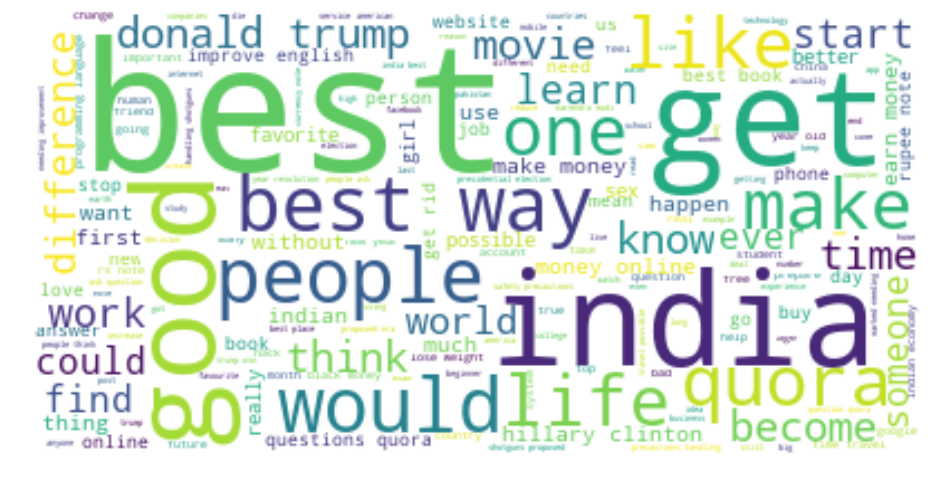

In [52]:
wc = WordCloud(background_color="white", max_words=len(text_dulicate), stopwords=stop_words)
wc.generate(text_dulicate)
print ("Word Cloud for Duplicate Question pairs")
plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non Duplicate Question pairs


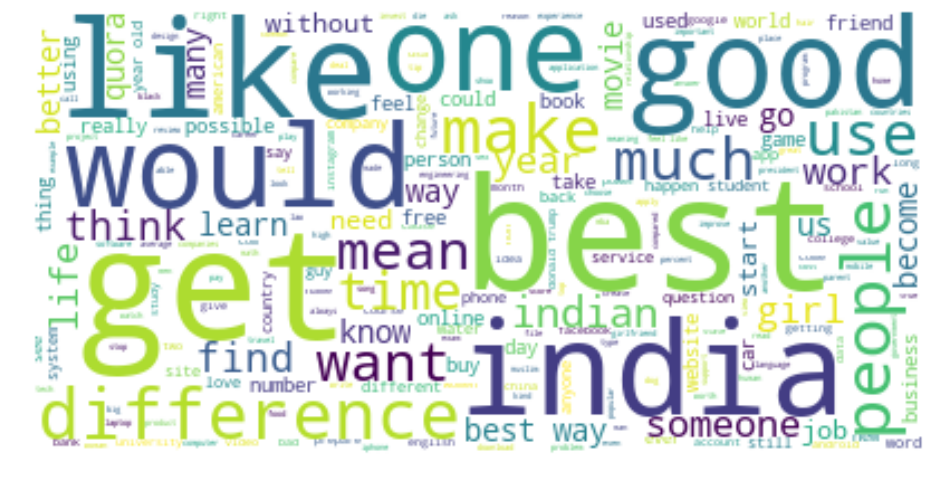

In [53]:
wc = WordCloud(background_color="white", max_words=len(text_non_dulicate), stopwords=stop_words)
wc.generate(text_non_dulicate)
print ("Word Cloud for non Duplicate Question pairs")
plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
X = MinMaxScaler().fit_transform(df_train[['q1_len', 'q2_len', 'q1_no_words', 'q2_no_words', 'total_uni_words', 'total_words', 'common_words', 'word_share', 'simple_ratio', 'partial_ratio', 'token_sort_ratio', 'token_set_ratio']])
y = df_train['is_duplicate'].values

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [55]:
X

array([[0.08571429, 0.0494382 , 0.09259259, ..., 0.68181818, 0.87878788,
        0.92473118],
       [0.13214286, 0.07191011, 0.14814815, ..., 0.77272727, 0.71717172,
        0.78494624],
       [0.32857143, 0.48764045, 0.31481481, ..., 0.54545455, 0.08080808,
        0.55913978],
       ...,
       [0.07142857, 0.11011236, 0.09259259, ..., 0.79545455, 0.64646465,
        1.        ],
       [0.30714286, 0.17752809, 0.2962963 , ..., 0.5       , 0.54545455,
        0.52688172],
       [0.2       , 0.11011236, 0.16666667, ..., 0.45454545, 0.62626263,
        0.64516129]])

In [56]:
# tsne2d = TSNE(
#     n_components=2,
#     init='random', # pca
#     random_state=101,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(X)

In [57]:
# type(tsne2d)

In [58]:
# df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# # draw the plot in appropriate place in the grid
# sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
# plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
# plt.show()

In [59]:
# from sklearn.manifold import TSNE
# tsne3d = TSNE(
#     n_components=3,
#     init='random', # pca
#     random_state=101,
#     method='barnes_hut',
#     n_iter=1000,
#     verbose=2,
#     angle=0.5
# ).fit_transform(X)

In [60]:
# import plotly.graph_objs as go
# import plotly.offline as py
# trace1 = go.Scatter3d(
#     x=tsne3d[:,0],
#     y=tsne3d[:,1],
#     z=tsne3d[:,2],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         color = y,
#         colorscale = 'Portland',
#         colorbar = dict(title = 'duplicate'),
#         line=dict(color='rgb(255, 255, 255)'),
#         opacity=0.75
#     )
# )

# data=[trace1]
# layout=dict(height=800, width=800, title='3d embedding with engineered features')
# fig=dict(data=data, layout=layout)
# py.iplot(fig, filename='3DBubble')

In [73]:

# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
# ['id', 'qid1', 'qid2', 'question1', 'question2']
cols = list(df_train.columns)
for i in cols:
    if i not in ['id', 'qid1', 'qid2', 'question1', 'question2']:
        df_train[i] = df_train[i].apply(pd.to_numeric)
        print(i)

is_duplicate
q1_len
q2_len
q1_no_words
q2_no_words
total_uni_words
total_words
common_words
word_share
simple_ratio
partial_ratio
token_sort_ratio
token_set_ratio


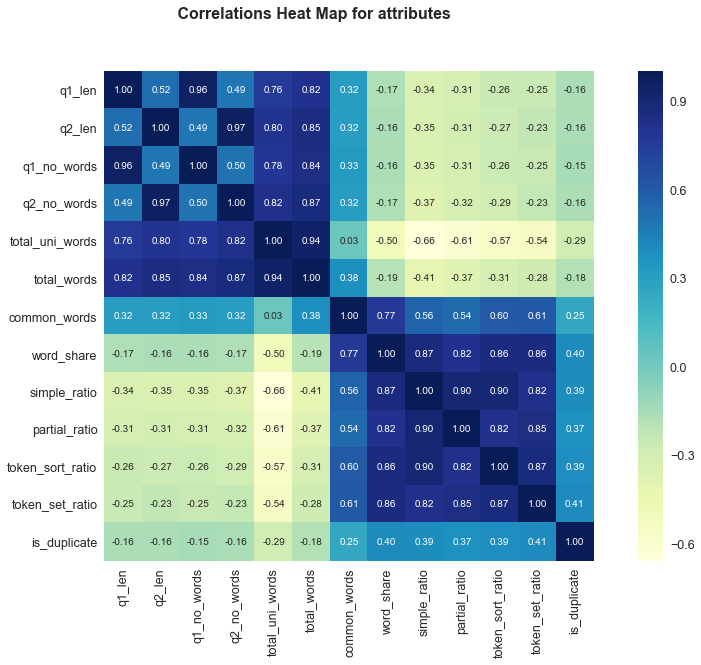

In [78]:
import seaborn as sns
cor = df_train[['q1_len', 'q2_len', 'q1_no_words', 'q2_no_words', 'total_uni_words', 'total_words', 'common_words', 'word_share', 'simple_ratio', 'partial_ratio', 'token_sort_ratio', 'token_set_ratio', 'is_duplicate']].corr()
sns.set(font_scale=1.25)
plt.figure(figsize=(16,9))
hm = sns.heatmap(cor, cbar=True, annot=True, square=True,cmap="YlGnBu",
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=list(cor.columns), xticklabels=list(cor.columns))
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')
plt.show()


# # ref: https://www.kaggle.com/fg1983/data-exploration-and-price-prediction-house-sales

In [62]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share,simple_ratio,partial_ratio,token_sort_ratio,token_set_ratio
384680,384680,84825,319370,how can i learn very quickly?,how we can learn quickly?,1,29,25,6,5,7,11,4,0.363636,81,72,88,93
156636,156636,35977,4428,how do i gain weight at sixteen years old?,how do i gain weight as a teenager?,1,42,35,9,8,12,17,5,0.294118,78,80,72,80
168181,168181,260576,49474,i am 19 years old. i want to start a business ...,i am a 23 year old guy. i want to start a busi...,0,97,220,18,48,49,56,7,0.125000,24,60,9,59
192976,192976,292762,292763,how can i be good at sales?,how can someone be good at sales?,1,27,33,7,7,8,14,6,0.428571,87,74,83,96
78884,78884,67539,134407,did someone in game of thrones really have his...,what if littlefinger (game of thrones) got his...,0,61,71,12,13,23,25,2,0.080000,48,52,48,48


### Random train test split

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score
# define tfidf vectorizer 
tfidf = TfidfVectorizer(analyzer = 'word',token_pattern=r'\w{1,}',
                        ngram_range=(1,2),use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = 'english',
                        lowercase = True,
                        max_features = None,
                        norm = 'l1')

In [64]:
# text_dulicate
s1 = pd.Series(df_train['question1'].tolist())
s2 = pd.Series(df_train['question2'].tolist())
BagOfWords = pd.concat([s1, s2])

In [65]:
tfidf.fit(BagOfWords)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l1', preprocessor=None, smooth_idf=1,
        stop_words='english', strip_accents=None, sublinear_tf=1,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=1,
        vocabulary=None)

In [66]:
train_q1_tfidf = tfidf.transform(df_train['question1'])
train_q2_tfidf = tfidf.transform(df_train['question2'])

In [67]:
# X = abs(train_q1_tfidf - train_q2_tfidf)
X= df_train[[\
       'q1_len', 'q2_len', 'q1_no_words', 'q2_no_words', 'total_uni_words',\
       'total_words', 'common_words', 'word_share']]
y = df_train['is_duplicate']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
pred_lr = lr.predict_proba(X_test)[:,1]
logloss_lr = log_loss(y_test, pred_lr)
print("Accuracy:", lr.score(X_test, y_test))
print("Log Loss : ", logloss_lr)


Accuracy: 0.667
Log Loss :  0.5609745484108055


In [71]:
df_train.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'q1_no_words', 'q2_no_words', 'total_uni_words',
       'total_words', 'common_words', 'word_share', 'simple_ratio',
       'partial_ratio', 'token_sort_ratio', 'token_set_ratio'],
      dtype='object')